In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
###read the csv file after imputation.
newpizza=pd.read_csv('/Users/georgeli/Desktop/stat3011/Project 2/pizza__GDP.csv')

In [2]:
newpizza.head(2)##view the data set

,Unnamed: 0,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,...,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,average_price,GDP
0,1778,AVwdbU__IN2L1WUfvtBm,1000 Mall Of San Juan Blvd,Restaurant,San Juan,US,us/altdeberwind/sanjuan/1000mallofsanjuanblvd/...,18.411826,-66.024871,NaN,...,"Boursin, mozzarella, arugula, parmesan",Sausage Onion Jam Pizza,Brio Tuscan Grille - Puerto Rico,924,USD,0.0,30.0,Alt De Berwind,8.95,146826
1,2980,AVwdwjsLkufWRAb58_Vm,424,"Pizza Delivery,Grocers-Ethnic Foods,Italian Gr...",Chicopee,US,us/ma/chicopee/424/595885510,42.147975,-72.600715,http://www.yellowpages.com/chicopee-ma/mip/joh...,...,NaN,Combination Pizza (extra Large 28 Pieces),John's Pizzeria,1013,NaN,NaN,NaN,MA,22.00,52229


In [3]:
newpizza.describe()## view the distribution of data

,Unnamed: 0,latitude,longitude,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax,average_price,GDP
count,3510.00000,3510.000000,3510.000000,3510.000000,3510.000000,1557.000000,1557.000000,3510.000000,3510.000000
mean,1754.50000,38.555114,-87.472055,12.482742,11.431106,15.597945,36.566474,11.956924,96356.955840
std,1013.39405,4.651092,16.430008,12.277341,6.653145,18.495854,21.737839,8.403799,78558.353118
min,0.00000,18.411826,-157.837461,0.250000,0.250000,0.000000,12.000000,0.250000,4090.000000
25%,877.25000,35.769852,-94.202573,8.000000,7.990000,0.000000,30.000000,8.000000,39615.000000
50%,1754.50000,40.020710,-81.675414,12.479186,11.427849,25.000000,40.000000,11.953518,56126.000000
75%,2631.75000,41.455179,-74.743820,14.990000,13.990000,25.000000,40.000000,14.490000,146826.000000
max,3509.00000,64.854370,-66.024871,312.950000,118.990000,347.000000,666.000000,161.950000,278260.000000


In [4]:
newpizza.info()##view the variables names 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3510 non-null   int64  
 1   id                  3510 non-null   object 
 2   address             3510 non-null   object 
 3   categories          3510 non-null   object 
 4   city                3510 non-null   object 
 5   country             3510 non-null   object 
 6   keys                3510 non-null   object 
 7   latitude            3510 non-null   float64
 8   longitude           3510 non-null   float64
 9   menuPageURL         610 non-null    object 
 10  menus.amountMax     3510 non-null   float64
 11  menus.amountMin     3510 non-null   float64
 12  menus.currency      2951 non-null   object 
 13  menus.dateSeen      3510 non-null   object 
 14  menus.description   1526 non-null   object 
 15  menus.name          3510 non-null   object 
 16  name  

In [29]:
#Extract interested columns
pizza=newpizza[['id', 'city', 'address', 'postalCode', 
                          'menus.name', 'menus.amountMax', 'menus.amountMin',"average_price","GDP"]]
pizza.head(3)

,id,city,address,postalCode,menus.name,menus.amountMax,menus.amountMin,average_price,GDP
0,AVwdbU__IN2L1WUfvtBm,San Juan,1000 Mall Of San Juan Blvd,924,Sausage Onion Jam Pizza,8.95,8.95,8.95,146826
1,AVwdwjsLkufWRAb58_Vm,Chicopee,424,1013,Combination Pizza (extra Large 28 Pieces),22.00,22.00,22.00,52229
2,AVwdwjsLkufWRAb58_Vm,Chicopee,424,1013,Combination Pizza (large 20 Pieces),18.00,18.00,18.00,52229


# Find the correlation between numerical variables

In [30]:
pizza.corr() ##calculate the correlation between each variables.

,menus.amountMax,menus.amountMin,average_price,GDP
menus.amountMax,1.000000,0.535595,0.942474,0.113070
menus.amountMin,0.535595,1.000000,0.787074,0.066251
average_price,0.942474,0.787074,1.000000,0.108818
GDP,0.113070,0.066251,0.108818,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


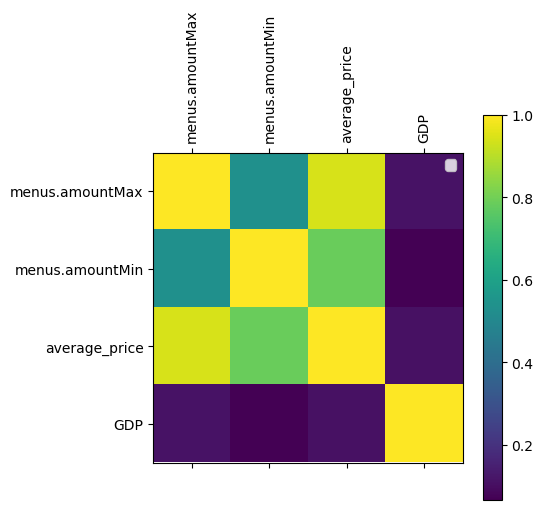

In [31]:
import matplotlib.pyplot as plt

def plot_corr(df,size=5):
    #'''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    #Input:
       # df: pandas DataFrame
       # size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(pizza)


# Delete Outliers

In [32]:
###define detecting outliers rules
Q1=np.quantile(newpizza['average_price'],0.25)
Q3=np.quantile(newpizza['average_price'],0.75)
lowerlimit=Q1-1.5*(Q3-Q1)
upperlimit=Q3+1.5*(Q3-Q1)
print(f"The lowerlimit and upperlimit of average price are{lowerlimit} and {upperlimit}")

The lowerlimit and upperlimit of average price are-1.7349999999999994 and 24.225


In [41]:
###since the lowerlimit is negative, we only select the data below upperlimit.
non_outlier_pizza=newpizza[newpizza['average_price']<upperlimit]
non_outlier_pizza.shape
###view the dimension of new data set without outliers
print(f"{newpizza.shape[0]-non_outlier_pizza.shape[0]} outliers are dropped, the new data set only contains {non_outlier_pizza.shape[0]} rows now")

59 outliers are dropped, the new data set only contains 3451 rows now


# data visualisation

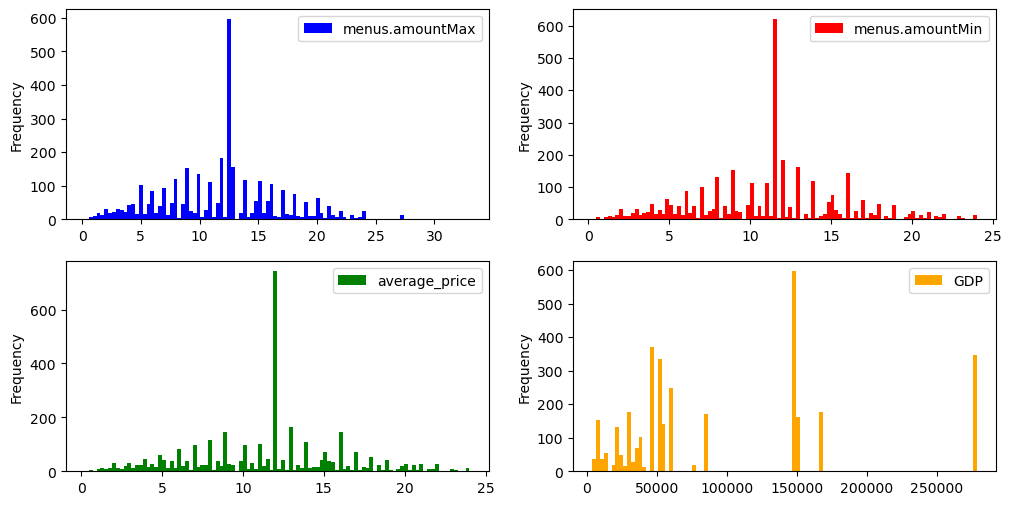

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))##create 2 by 2 figues
non_outlier_pizza.plot(kind="hist", y="menus.amountMax", bins=100, color="b", ax=axes[0][0]) 
###bins means divide data into n groups.When the bins become larger, the bar become thiner.
###ax represent the plot location [0][0] represent the (1,1)
non_outlier_pizza.plot(kind="hist", y="menus.amountMin", bins=100, color="r", ax=axes[0][1])
non_outlier_pizza.plot(kind="hist", y="average_price", bins=100, color="g", ax=axes[1][0])
non_outlier_pizza.plot(kind="hist", y="GDP", bins=100, color="orange", ax=axes[1][1])
5
plt.show()

# Most Popular Restaurant

In [60]:
##use groupby function to count the frequency of store restaurant.
pizza_name_df_count= non_outlier_pizza.groupby(['name']).size().to_frame('count').reset_index()
###show the top ten restaurants by using sort_values functions.
pizza_name_df_count.sort_values(by='count', ascending=False)[:10]

,name,count
731,Sicilia's Pizzeria,96
371,J & G Restaurant,55
162,Casey's General Store,43
831,The Pizza Joint,35
569,North End Pizzeria,34
428,Labella Pizza and Pasta,31
318,Giovanni's Pizzeria,30
562,Nino's Trattoria & Pizzeria,28
603,Papa John's Pizza,27
773,Takka Grill,26


# Most Popular Pizza

In [61]:
###drop the duplicates data when the id & pizza names are same at the time.
pizza_sub = non_outlier_pizza.drop_duplicates(subset=['id', 'menus.name'])
##count the type of pizza
names_of_pizza = pizza_sub['menus.name'].value_counts()
names_of_pizza

Cheese Pizza                       130
White Pizza                         74
Margherita Pizza                    60
Pizza                               57
Hawaiian Pizza                      52
                                  ... 
Apple Pie Pizza                      1
American Pizza                       1
Straight Up Junior Pizza             1
Pepperoni Cheese Pizza               1
Pizza Sandwich and Medium Drink      1
Name: menus.name, Length: 1572, dtype: int64

In [62]:
# drop duplicates
pizza_sub = non_outlier_pizza.drop_duplicates(subset=['id', 'menus.name'])

# count the pizza names
names_of_pizza = pizza_sub['menus.name'].value_counts()

# merge `names_of_pizza` to `pizza_sub`
pizza_sub = pd.merge(pizza_sub, names_of_pizza.to_frame(),
                     left_on='menus.name', right_index=True, how='left')


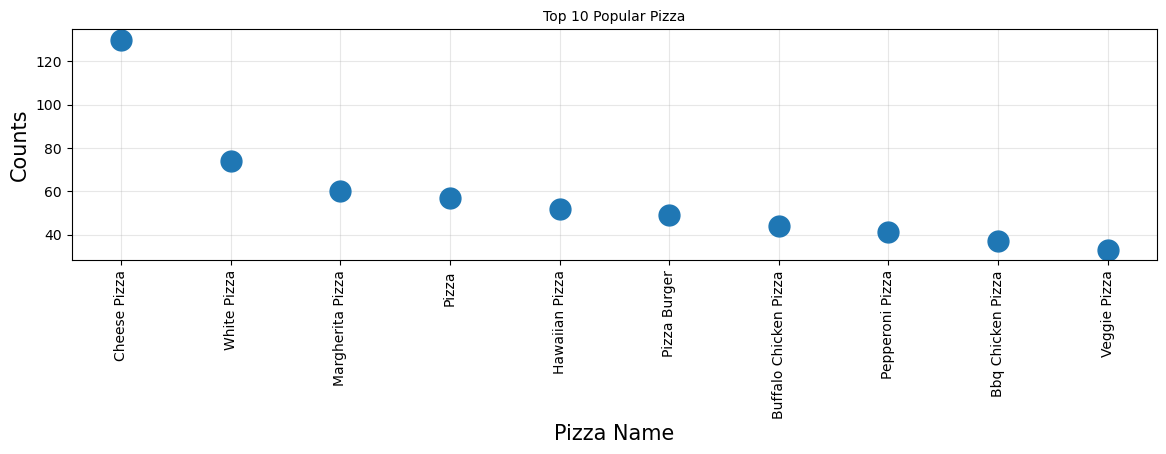

In [65]:
###call the figure function and set the values.
plt.figure(figsize=(14,3))
##plot the top 10 pizza names in scatter plot.
plt.plot(names_of_pizza.head(10), linestyle='none', markersize=15, marker='o')
###make a title
plt.title('Top 10 Popular Pizza', fontsize=10)
###get and set the current tick locations and labels of the x-axis.
plt.xticks(rotation=90)
##set the x and y label name
plt.xlabel('Pizza Name', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.grid(alpha=.3)
plt.margins(.05)
plt.show()


In [50]:
# Download and unzip our zipfile
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/14zpallagi.csv.zip'
zipresp = urlopen(zipurl) # Create a new file on the hard drive
tempzip = open("/tmp/tempfile.zip", "wb") # Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read()) # Close the newly-created file
tempzip.close() # Re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip") # Extract its contents into <extraction_path>
zf.extractall(path = '') # note that extractall will automatically create the path, left blank so it's in working directory
# close the ZipFile instance
zf.close()

In [51]:
# read zipcode data
zipcode = pd.read_csv('14zpallagi.csv', usecols=['STATE', 'zipcode'], dtype={'zipcode': 'str'})
zipcode.head()

,STATE,zipcode
0,AL,00000
1,AL,00000
2,AL,00000
3,AL,00000
4,AL,00000


In [52]:
# drop duplicates
zipcode = zipcode.drop_duplicates(['zipcode'])
zipcode.head()

,STATE,zipcode
0,AL,00000
6,AL,35004
12,AL,35005
18,AL,35006
24,AL,35007


In [54]:
# merge `pizza data` and `zipcode data`

pizza_merge = pd.merge(pizza_sub, zipcode, left_on='postalCode', right_on='zipcode', how='left')
###left_on is the previous data coloumn values such as vlookup in excel, right_on is the corresponding value.
## how=left means that the data will merge by left_on data order.
pizza_merge=pizza_merge.dropna(subset=['STATE'])
###drop the data if the state is na
pizza_merge.head(4)

,Unnamed: 0,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,...,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,average_price,GDP,STATE,zipcode
613,1664,AVwdA5OgByjofQCxkmWM,42 W 35th St,"American Restaurant Koreatown,Irish",New York,US,us/gpo/newyork/42w35thst/-1937024218,40.749852,-73.986215,NaN,...,Brendan's Bar & Grill,10001,USD,50.0,55.0,G P O,13.500000,146826,NY,10001
614,1665,AVwdA5OgByjofQCxkmWM,42 W 35th St,"American Restaurant Koreatown,Irish",New York,US,us/gpo/newyork/42w35thst/-1937024218,40.749852,-73.986215,NaN,...,Brendan's Bar & Grill,10001,USD,50.0,55.0,G P O,13.500000,146826,NY,10001
615,1666,AVwdA5OgByjofQCxkmWM,42 W 35th St,"American Restaurant Koreatown,Irish",New York,US,us/gpo/newyork/42w35thst/-1937024218,40.749852,-73.986215,NaN,...,Brendan's Bar & Grill,10001,USD,50.0,55.0,G P O,13.500000,146826,NY,10001
616,333,AVwcf_LY_7pvs4fzvvkV,173 Ludlow St,"Restaurant,Italian Restaurant,Italian Restaura...",New York,US,us/newyorkcity/newyork/173ludlowst/-1838822714,40.721850,-73.987714,NaN,...,Tre Restaurant & Wine Bar,10002,USD,25.0,40.0,New York City,11.953518,146826,NY,10002


In [63]:
# count the restaurants by State
counts = pizza_merge.STATE.value_counts()

# merge
pizza_clean = pd.merge(pizza_merge, counts.to_frame(), 
                       left_on='STATE', right_index=True, how='left')
pizza_clean.head()

,Unnamed: 0,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,...,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,average_price,GDP,STATE_x,zipcode,STATE_y
613,1664,AVwdA5OgByjofQCxkmWM,42 W 35th St,"American Restaurant Koreatown,Irish",New York,US,us/gpo/newyork/42w35thst/-1937024218,40.749852,-73.986215,NaN,...,10001,USD,50.0,55.0,G P O,13.500000,146826,NY,10001,358
614,1665,AVwdA5OgByjofQCxkmWM,42 W 35th St,"American Restaurant Koreatown,Irish",New York,US,us/gpo/newyork/42w35thst/-1937024218,40.749852,-73.986215,NaN,...,10001,USD,50.0,55.0,G P O,13.500000,146826,NY,10001,358
615,1666,AVwdA5OgByjofQCxkmWM,42 W 35th St,"American Restaurant Koreatown,Irish",New York,US,us/gpo/newyork/42w35thst/-1937024218,40.749852,-73.986215,NaN,...,10001,USD,50.0,55.0,G P O,13.500000,146826,NY,10001,358
616,333,AVwcf_LY_7pvs4fzvvkV,173 Ludlow St,"Restaurant,Italian Restaurant,Italian Restaura...",New York,US,us/newyorkcity/newyork/173ludlowst/-1838822714,40.721850,-73.987714,NaN,...,10002,USD,25.0,40.0,New York City,11.953518,146826,NY,10002,358
617,499,AVwchtud_7pvs4fzwECD,302 E 12th St,"Restaurant,Italian Restaurant,Italian Restaura...",New York,US,us/manhattan/newyork/302e12thst/-1562848649,40.730686,-73.985496,NaN,...,10003,USD,25.0,40.0,Manhattan,10.950000,146826,NY,10003,358


In [66]:
pizza_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2566 entries, 613 to 3226
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2566 non-null   int64  
 1   id                  2566 non-null   object 
 2   address             2566 non-null   object 
 3   categories          2566 non-null   object 
 4   city                2566 non-null   object 
 5   country             2566 non-null   object 
 6   keys                2566 non-null   object 
 7   latitude            2566 non-null   float64
 8   longitude           2566 non-null   float64
 9   menuPageURL         407 non-null    object 
 10  menus.amountMax     2566 non-null   float64
 11  menus.amountMin     2566 non-null   float64
 12  menus.currency      2170 non-null   object 
 13  menus.dateSeen      2566 non-null   object 
 14  menus.description   1076 non-null   object 
 15  menus.name          2566 non-null   object 
 16  name

In [69]:
# count the restaurants by State
counts = pizza_merge.STATE.value_counts()

# merge
pizza_clean = pd.merge(pizza_merge, counts.to_frame(), 
                       left_on='STATE', right_index=True, how='left')

# Use the subsets
pizza_clean = pizza_clean[['city', 'address', 'menus.name',
                        'latitude', 'longitude', 
                        'menus.amountMax', 'menus.amountMin',
                        'average_price','GDP', 'STATE_x', 'STATE_y']]
# rename columns
pizza_clean.columns = ['city', 'address', 'pizza_name',
                        'latitude', 'longitude', 
                        'menus_amountMax', 'menus_amountMin',
                        'average_price','GDP', 'state', 'state_counts']

pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,average_price,GDP,state,state_counts
613,New York,42 W 35th St,Margherita Pizza,40.749852,-73.986215,15.000000,12.000000,13.500000,146826,NY,358
614,New York,42 W 35th St,Pepperoni Pizza,40.749852,-73.986215,15.000000,12.000000,13.500000,146826,NY,358
615,New York,42 W 35th St,Traditional Pizza,40.749852,-73.986215,15.000000,12.000000,13.500000,146826,NY,358
616,New York,173 Ludlow St,Vegetarian Pizza,40.721850,-73.987714,12.479186,11.427849,11.953518,146826,NY,358
617,New York,302 E 12th St,Marinara Pizza,40.730686,-73.985496,10.950000,10.950000,10.950000,146826,NY,358


In [70]:
###use value_count function to count the frequencies of states in data.
pizza_state = pd.DataFrame(pizza_merge['STATE'].value_counts().head(10))
pizza_state

,STATE
NY,358
CA,320
PA,236
FL,166
IL,157
OH,133
TX,132
MD,109
MI,72
IN,66


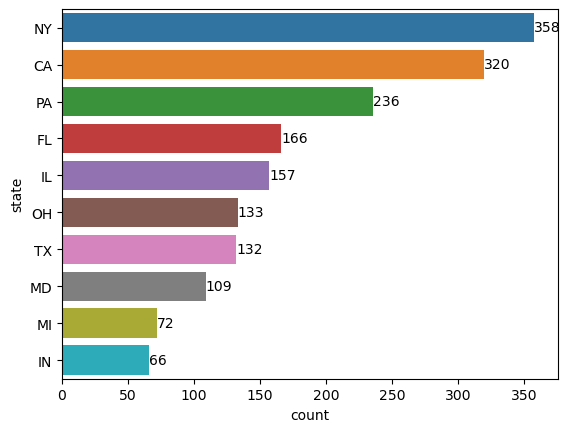

In [72]:
import matplotlib.pyplot as plt
import seaborn 
##Use seaborn.countplot to create a horizontal bar chart and set the y-aixs as state, order as value count in top 10 data.
g = seaborn.countplot(y = 'state', data = pizza_clean ,
                  order=pizza_clean.state.value_counts().iloc[:10].index)
###list the frequency numbers for each state such as 358 for NY
for index, value in enumerate(list(pizza_clean.state.value_counts().iloc[:10].values)):
    g.text(value , index + .1, str(value))

# Average pizza price per State

In [74]:
###group the average_price based on state
pizza_clean.groupby('state')['average_price'].mean().reset_index().sort_values(by = 'average_price', ascending = False).head(10)


,state,average_price
38,UT,15.235708
28,NV,13.347808
29,NY,13.284680
8,FL,12.834656
16,KY,12.727366
10,HI,12.358308
4,CA,12.297828
36,TN,12.235878
6,DC,12.113379
30,OH,12.020604


In [75]:
###group the average_price based on city
pizza_clean.groupby('city')['average_price'].mean().reset_index().sort_values(by = 'average_price', ascending = False).head(10)


,city,average_price
387,Pound Ridge,23.000000
263,Lawrenceville,21.950000
292,Massapequa Park,20.500000
529,Yucaipa,20.445667
348,Ocala,20.083333
209,Highwood,19.990000
468,Stuart,19.950000
109,Corvallis,19.500000
27,Babylon,19.484286
413,Rohnert Park,18.500000


In [76]:
import plotly.graph_objects as go
###use the sub data from pizza_clean goupby in average price
pizza_map=pizza_clean.groupby('state')['average_price'].mean().reset_index().sort_values(by = 'average_price', ascending = False)
fig = go.Figure(data=go.Choropleth(
    locations=pizza_map['state'], ###set the locations from the state column in data set
    z=pizza_map['average_price'].astype(float),  ### set the variable as average_price.
    locationmode='USA-states',   ### set the map as USA
    colorscale='Reds',    ### set the map color as different level of red
    autocolorscale=False,
    text=pizza_map['state'], # hover text  
    marker_line_color='white', # line markers between states
    colorbar_title="Average prizes of pizzas"
))

fig.update_layout(
    title_text='Pizza Resturants in each US State', ### set the title
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),### set the color for each small parts in map.
)

fig.show()

# Pizza Restaurant location


In [77]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = newpizza['longitude'],### use longitude and latitude to show the stores in USA map
        lat = newpizza['latitude'],
        text = newpizza['name'],  ### show the pizza restaurants name
        mode = 'markers',    ### scatters
        #marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Pizza Resturant Locations in the US', ### add title
        geo_scope='usa',
    )
fig.show()

In [78]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=pizza_clean['state'],  ###set the locations from the state column in data set
    z=pizza_clean['state_counts'].astype(float), ## set the variable as state frequency
    locationmode='USA-states',   ### set the map as USA map
    colorscale='Reds',   ### use different level of red color 
    autocolorscale=False, 
    text=pizza_clean['state'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Number of Resturants"
))

fig.update_layout(
    title_text='Pizza Resturants in each US State',  ### add a map title
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()